### Obtaining a dataset

For this exercise we'll use a dataset from the Machine Learning Repository hosted by The University of California att Irvine. You can view the complete repository [here](https://archive.ics.uci.edu/ml/index.php). We'll be using the __Adult__ dataset, which contains information from the 1994 US census. The fields in the dataset are

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* Income level: <=50K or >50K

We can use this dataset to investigate and graph out various things, using Numpy and matplotlib.

In [4]:
import numpy as np
import requests
import matplotlib.pyplot as plt


raw_data = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data').text
print(raw_data[:100])

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 


The data is in CSV format. We can store this in a numpy matrix using the `genfromtxt` method. This method, per the documentation, requires that the input be a filename, a generator, or a list of string. A generator or a list will work equally well here.

In [6]:
data = raw_data.split("\n")
# print(data[0])
dataFromGen = np.genfromtxt(data, dtype=str, encoding=str, delimiter=",")
# print(dataset[0])


array = np.array(dataFromGen)
# print(array[0][3]) # degree index
# print(array[0][5]) # marital index
# print(array[0][6]) # occupation index
# print(array[0][14]) # income index

### Analyzing the Data

Now that we have the dataset we can being our analysis. To start with, try counting the number of people with a bachelors degree (or higher) that have an income level above \\$50,000 and how many have an income level less than \\$50,000, and creating a simple bar chart illustrating the difference.

In [8]:
greater50Income = array[array[:,14] == ' >50K']
greater50IncomeCount = len(greater50Income)
print(">50K Income: {}".format(greater50IncomeCount))

less50Income = array[array[:,14] == ' <=50K']
less50IncomeCount = len(less50Income)
print("<=50K Income: {}".format(less50IncomeCount))

bachelors = array[array[:,3] == ' Bachelors']
bachelorsCount = len(bachelors)
print("Bachelors: {}".format(bachelorsCount))

bachAndGreater50Income = array[np.where((array[:,3] == ' Bachelors') & (array[:,14] == ' >50K'))]
bachAndGreater50IncomeCount = len(bachAndGreater50Income)
print("Bachelors and >50K Income: {}".format(bachAndGreater50IncomeCount))

bachAndLess50Income = array[np.where((array[:,3] == ' Bachelors') & (array[:,14] == ' <=50K'))]
bachAndLess50IncomeCount = len(bachAndLess50Income)
print("Bachelors and <=50K Income: {}".format(bachAndLess50IncomeCount))

>50K Income: 7841
<=50K Income: 24720
Bachelors: 5355
Bachelors and >50K Income: 2221
Bachelors and <=50K Income: 3134


Next, determine which of the occupations is the most likely to net you more than \\$50,000 a year, and graph the results


 Exec-managerial is most likely to net you >50K Income


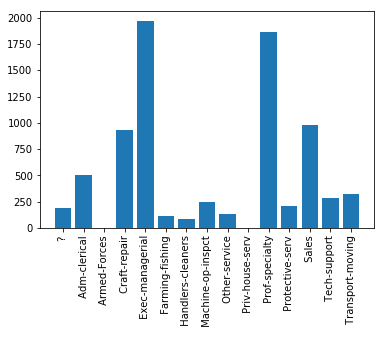

In [10]:
occupations = np.unique(array[:,6])

greater50IncomeCounts = []
for occupation in occupations:
    tmp = array[np.where((array[:,6] == occupation) & (array[:,14] == ' >50K'))]
    greater50IncomeCounts.append(len(tmp))
greater50IncomeCounts

maxValue = np.amax(greater50IncomeCounts)
indexOfMaxValue = greater50IncomeCounts.index(maxValue)
maxOccupation = occupations[indexOfMaxValue]
print("{} is most likely to net you >50K Income".format(maxOccupation))

x = occupations
y = greater50IncomeCounts
labels = occupations

plt.bar(x, y)
plt.xticks(x, labels, rotation='vertical')
plt.show()

Finally, determine whether marital status is a significant factor in determining income level

 Never-married <=50K is most common


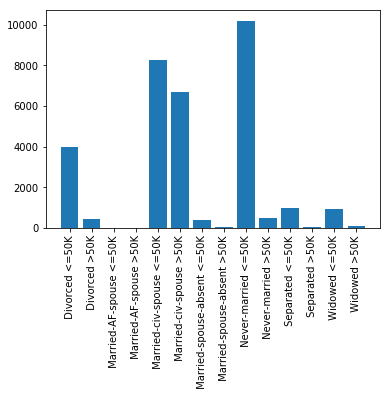

In [46]:
maritalStatuses = np.unique(array[:,5])
incomeStatuses = np.unique(array[:,14])

incomeCounts = []
MaritalIncomeStatuses = []
for marital in maritalStatuses:
    for income in incomeStatuses:
        tmp = array[np.where((array[:,5] == marital) & (array[:,14] == income))]
        incomeCounts.append(len(tmp))
        MaritalIncomeStatuses.append(marital+income)
        
arrayOfArrays
maxValue = np.amax(incomeCounts)
indexOfMaxValue = incomeCounts.index(maxValue)
maxMarital = MaritalIncomeStatuses[indexOfMaxValue]
print("{} is most common".format(maxMarital))

x = MaritalIncomeStatuses
y = xIncomeCounts
labels = MaritalIncomeStatuses

plt.bar(x, y)
plt.xticks(x, labels, rotation='vertical')
plt.show()